In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from keras import Model
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers import GlobalMaxPooling2D
tf.__version__
import cv2
import cv2 as cv
import pytesseract
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [3]:
data = pd.read_csv('/Users/flatironschool/Downloads/annotation.txt', sep=None, engine='python',nrows=7500)

In [4]:
data.head()

,filename,color,micro_category,macro_category,macro_category(english),Unnamed: 5,Unnamed: 6,Unnamed: 7
0,35154736FEF.jpg,BRONZO,GONNA PELLE,ABBIGLIAMENTO PELLE,leather,NaN,NaN,NaN
1,35157444XDF.jpg,PLATINO,GONNA PELLE,ABBIGLIAMENTO PELLE,leather,NaN,NaN,NaN
2,35157749QFF.jpg,NOCCIOLA,GONNA PELLE,ABBIGLIAMENTO PELLE,leather,NaN,NaN,NaN
3,35165506NDF.jpg,ORO,GONNA PELLE,ABBIGLIAMENTO PELLE,leather,NaN,NaN,NaN
4,35167181CRF.jpg,ANTRACITE,GONNA PELLE,ABBIGLIAMENTO PELLE,leather,NaN,NaN,NaN


In [5]:
data.drop(columns=['Unnamed: 5','Unnamed: 6','Unnamed: 7'],inplace=True)

In [6]:
data.isnull().any()

filename                   False
color                      False
micro_category             False
macro_category             False
macro_category(english)    False
dtype: bool

In [7]:
data['macro_category(english)'].unique()

array(['leather', 'suits', 'accessories', 'diaries', 'nursing',
       'furniture', 'bags', 'footwear'], dtype=object)

In [8]:
data.micro_category.unique()

array(['GONNA PELLE', 'PANTALONE PELLE', 'CAPOSPALLA PELLE',
       'CAPISPALLA PELLICCIA', 'GILET', 'ABITO', 'COLLI', 'CINTURA',
       'SCIARPA', 'SCIALLE', 'OCCHIALI', 'PORTACHIAVI', 'CAPPELLO',
       'PORTAMONETE', 'CRAVATTA', 'PORTAFOGLIO', 'GUANTI', 'FOULARD',
       'STOLA', 'Accessori per capelli', 'PORTADOCUMENTI', 'Bustina',
       'MANICHE', 'FIBBIE', 'BRETELLE', 'PAPILLON', 'PORTA-AGENDA',
       'OMBRELLO', 'Taccuini', 'Agende', 'Biberon', 'Stools', 'Sedute',
       'Piccoli Mobili', 'Tavolini', 'BORSA GRANDE IN TESSUTO',
       'BORSA PICCOLA IN PELLE', 'BORSA GRANDE IN PELLE',
       'BORSA MEDIA IN TESSUTO', 'BORSA MEDIA IN PELLE', 'POCHETTE',
       'BORSA PICCOLA IN TESSUTO', 'MARSUPIO', 'ZAINO', 'ZEPPE',
       'BALLERINA', 'SNEAKERS', 'STIVALETTI', 'SANDALI CON TACCO',
       'DECOLLETES', 'SANDALI', 'MOCASSINI ', 'DECOLLETES CON PLATEAU',
       'INFRADITO', 'SANDALI CON PLATEAU', 'DECOLLETES OPEN TOE',
       'STRINGATA', 'STIVALI', 'CIABATTE', 'Peep-toe ballet f

In [9]:
data1=data.replace(to_replace =['GONNA PELLE', 'PANTALONE PELLE', 'CAPOSPALLA PELLE',
       'CAPISPALLA PELLICCIA', 'GILET', 'ABITO', 'COLLI', 'CINTURA',
       'SCIARPA', 'SCIALLE', 'OCCHIALI', 'PORTACHIAVI', 'CAPPELLO',
       'PORTAMONETE', 'CRAVATTA', 'PORTAFOGLIO', 'GUANTI', 'FOULARD',
       'STOLA', 'Accessori per capelli', 'PORTADOCUMENTI', 'Bustina',
       'MANICHE', 'FIBBIE', 'BRETELLE', 'PAPILLON', 'PORTA-AGENDA',
       'OMBRELLO', 'Taccuini', 'Agende', 'Biberon', 'Stools', 'Sedute',
       'Piccoli Mobili', 'Tavolini', 'BORSA GRANDE IN TESSUTO',
       'BORSA PICCOLA IN PELLE', 'BORSA GRANDE IN PELLE',
       'BORSA MEDIA IN TESSUTO', 'BORSA MEDIA IN PELLE', 'POCHETTE',
       'BORSA PICCOLA IN TESSUTO', 'MARSUPIO', 'ZAINO', 'ZEPPE',
       'BALLERINA', 'SNEAKERS', 'STIVALETTI', 'SANDALI CON TACCO'],  
                            value =['LEATHER SKIRT ',' LEATHER TROUSERS ',' LEATHER OUTERWEAR ','FUR COATS', 'VESTS', 'DRESS', 'COLLI', 'BELT','SCARF', 'SHAWL', 'GLASSES', 'KEYCHAIN', 'HAT','PURSE', 'TIE', 'WALLET', 'GLOVES', 'FOULARD','STOLA', 'Hair accessories', 'DOCUMENT HOLDER', 'Sachet','SLEEVES', 'BUCKLES', 'BRACES', 'PAPILLON', 'BOOK-HOLDER','UMBRELLA', 'Notebooks', 'Agendas', 'Baby Bottles', 'Stools', 'Sittings','Small Furniture', 'Coffee Tables', 'LARGE FABRIC BAG','SMALL LEATHER BAG', 'LARGE LEATHER BAG','MEDIUM FABRIC BAG', 'MEDIUM LEATHER BAG', 'CLUTCH','SMALL FABRIC BAG', 'BABY BAG', 'BACKPACK', 'WEDGES','BALLERINA', 'SNEAKERS', 'ANKLE BOOTS', 'SANDALS WITH HEEL']) 

In [10]:
data2=data1.replace(to_replace =['SABOT', 'POLACCHINA', 'SHOE BOOTS', 'ANFIBI', 'PANTOFOLE',
       'MANICHE LUNGHE', 'BLUSA', 'MANICHE CORTE', 'SENZA MANICHE',
       'CAMICIE MANICHE 3/4', 'CAFTANO', 'SOPRABITI', 'GIUBBOTTO',
       'GIACCA/BLAZER', 'MANTELLA', 'TUTINA TERMICA', 'CAPPOTTO',
       'GIACCONE', 'IMPERMEABILE', 'PIUMINO', 'PELLICCIA ECOLOGICA',
       'Oggettistica', 'Vaso', 'Contenitore', 'Accessori', 'Candelabri',
       'Decori', 'Candele', 'Accessori per Bambino', 'COMPLETO',
       'COMP. CON PANTALONE', 'TAILLEUR', 'COMP.CON GONNA',
       'COMP. CON SHORTS', 'Fitness', 'Pupazzi', 'ORECCHINI', 'COLLANA',
       'BRACCIALE', 'ANELLO', 'SPILLA', 'GEMELLI', 'PARURE', 'CAVIGLIERA',
       'CIONDOLO', 'ORECCHINO', 'GONNA LUNGA', 'GONNA LONGUETTE',
       'GONNA AL GINOCCHIO', 'MINIGONNA', 'GONNA', 'IDEE REGALO',
       'Gadget', 'PENNE & CO.', 'BAVAGLINI', 'PELUCHE',
       'Giochi per Bambini', 'TOY', 'Lampade da tavolo',
       'Lampade a sospensione', 'Lampade da parete', 'GONNA JEANS',
       'PANTALONI JEANS', 'CAPRI JEANS', 'SHORTS JEANS',
       'CAPOSPALLA JEANS', 'CAMICIA JEANS', 'BERMUDA JEANS', 'Salopette',
       'MAGLIA MANICHE LUNGHE', 'MAGLIA A COLLO ALTO', 'CARDIGAN',
       'MAGLIA MANICHE CORTE', 'MAGLIA A V', 'MAGLIA A POLO', 'CACHEMIRE',
       'MAGLIA SENZA MANICHE', 'SCALDACUORE', 'MAGLIA A GILET',
       'MAGLIA A GIROCOLLO', 'TWIN SET', 'MAGLIERIA', 'COPRICOSTUME',
       'Occhiali da sole', 'Occhiali da vista', 'PANTALONI',
       'PANTALONI CAPRI', 'SHORTS', 'LEGGINS', 'BERMUDA',
       'PANTALONI CLASSICI', 'Accessori per animali', 'Lettini',
       'Ciotole', 'Trasportini', 'Guinzagli', 'Collari', 'Materassini',
       'Cappottini', 'Pettorine', 'SALOPETTE PANTALONI CORTI',
       'SALOPETTE PANT LUNGO', 'SALOPETTE GONNA', 'FELPA',
       'FELPA CON CAPPUCCIO', 'PANTALONCINO FELPA', 'PANTALONE FELPA',
       'FELPA CON ZIP', 'TUTA FELPA AI05', 'Bicchieri',
       'Accessori da cucina', 'T� e Caff�', 'Accessori per la tavola',
       'Bar & Wine', 'Vassoio', 'Piatti', 'Pentole', 'Posate',
       'Utensili per la cucina', 'Accessori HI-TECH', 'Cuffie',
       'PORTACELLULARE', 'Radio', 'CHIAVETTA USB', 'COPERTINA BIMBO',
       'CUSCINO', 'Copriletto', 'PLAID', 'COPRI CUSCINI', 'Spugne',
       'Parure copripiumino', 'Coperte', 'T-SHIRT MANICHE LUNGHE',
       'T-SHIRT MANICHE CORTE', 'TOP', 'TOP A FASCIA',
       'T-SHIRT SENZA MANICHE', 'POLO', 'COPRISPALLA', 'TOPWEAR',
       'BORSA DA LAVORO', 'TROLLEY', 'BEAUTY CASE', 'BORSONE',
       'PORTA ABITI', 'VALIGIA', 'VESTITO CORTO', 'VESTITO LONGUETTE',
       'VESTITO LUNGO', 'VESTITO', 'TUTINE', 'VESTITI SPOSA', 'VESTITI',
       'Wrist watch'],  
                            value =['SABOT', 'POLACCHINA', 'SHOE BOOTS', 'ANFIBI', 'SLIPPERS','LONG SLEEVES', 'BLOUSE', 'SHORT SLEEVES', 'WITHOUT SLEEVES',
'3/4 SLEEVED SHIRTS', 'CAFTANO', 'COATS', 'JACKET',
'JACKET / BLAZER', 'CAPE', 'THERMAL SUIT', 'COAT',
'JACKET', 'WATERPROOF', 'DOWN JACKET', 'ECOLOGICAL FUR',
'Objects', 'Vase', 'Container', 'Accessories', 'Candelabra',
'Decors', 'Candles', 'Accessories for Children', 'COMPLETE',
'COMP. WITH PANTS ',' TAILLEUR ',' COMP. WITH SKIRT ',
'COMP. WITH SHORTS ',' Fitness', 'Puppets',' EARRINGS ',' NECKLACE ',
'BRACELET', 'RING', 'PIN', 'CUFFLINKS', 'PARURE', 'ANKLE',
'PENDANT', 'EARRING', 'LONG SKIRT', 'LONG SKIRT',
'KNEE SKIRT', 'MINISKIRT', 'SKIRT', 'GIFT IDEAS',
'Gadget', 'PENNE & CO.', 'BAVAGLINI', 'PELUCHE',
"Children's Games", 'TOY', 'Table lamps',
'Hanging lamps', 'Wall lamps', 'JEANS SKIRT',
'JEANS PANTS', 'CAPRI JEANS', 'SHORTS JEANS',
'JEANS OUTERWEAR', 'JEANS SHIRT', 'BERMUDA JEANS', 'Dungarees',
'LONG SLEEVE SWEATER', 'HIGH NECK SWEATER', 'CARDIGAN',
'SHORT SLEEVE JERSEY', 'V-SHIRT', 'POLO SHIRT', 'CACHEMIRE',
'SLEEVELESS SWEATER', 'HEATER', 'VEST WITH VEST',
'ROUND-NECK SWEATER', 'TWIN SET', 'KNITWEAR', 'COVER-COSTUME',
'Sunglasses', 'Eyeglasses', 'TROUSERS',
'CAPRI TROUSERS', 'SHORTS', 'LEGGINS', 'BERMUDA',
'CLASSIC TROUSERS', 'Pet accessories', 'Cots',
'Bowls', 'Carriers', 'Leashes', 'Collars', 'Mats',
'Cappottini', 'Pettorine', 'OVERALLS SHORT PANTS',
'LONG PANT BIB SHORTS', 'SKIRT BIB SHORTS', 'SWEATSHIRT',
'SWEATSHIRT WITH HOOD', 'SWEATSHIRTS', 'SWEATSHIRTS',
'SWEATSHIRT WITH ZIP', 'SUIT SWEATSHIRT AI05', 'Glasses',
'Kitchen accessories', 'Tea and coffee', 'Table accessories',
'Bar & Wine', 'Tray', 'Dishes', 'Pots', 'Cutlery',
'Kitchen utensils', 'HI-TECH accessories', 'Headphones',
'MOBILE PHONE', 'Radio', 'USB KEY', 'CHILD COVER',
'CUSHION', 'Bedspread', 'PLAID', 'CUSHION COVER', 'Sponges',
'Duvet cover set', 'Blankets', 'LONG SLEEVE T-SHIRTS',
'SHORT SLEEVE T-SHIRT', 'TOP', 'BANDED TOP',
'SLEEVELESS T-SHIRT', 'POLO', 'SHOULDER', 'TOPWEAR',
'WORK BAG', 'TROLLEY', 'BEAUTY CASE', 'BAG',
'CLOTHES HOLDER', 'SUITCASE', 'SHORT DRESS', 'LONGUETTE DRESS',
'LONG DRESS', 'DRESS', 'TUTINE', 'BRIDAL DRESSES', 'DRESSES',
'Wrist watch'])


In [11]:
data2.micro_category.unique()

array(['LEATHER SKIRT ', ' LEATHER TROUSERS ', ' LEATHER OUTERWEAR ',
       'FUR COATS', 'VESTS', 'DRESS', 'COLLI', 'BELT', 'SCARF', 'SHAWL',
       'GLASSES', 'KEYCHAIN', 'HAT', 'PURSE', 'TIE', 'WALLET', 'GLOVES',
       'FOULARD', 'STOLA', 'Hair accessories', 'DOCUMENT HOLDER',
       'Sachet', 'SLEEVES', 'BUCKLES', 'BRACES', 'PAPILLON',
       'BOOK-HOLDER', 'UMBRELLA', 'Notebooks', 'Agendas', 'Baby Bottles',
       'Stools', 'Sittings', 'Small Furniture', 'Coffee Tables',
       'LARGE FABRIC BAG', 'SMALL LEATHER BAG', 'LARGE LEATHER BAG',
       'MEDIUM FABRIC BAG', 'MEDIUM LEATHER BAG', 'CLUTCH',
       'SMALL FABRIC BAG', 'BABY BAG', 'BACKPACK', 'WEDGES', 'BALLERINA',
       'SNEAKERS', 'ANKLE BOOTS', 'SANDALS WITH HEEL', 'DECOLLETES',
       'SANDALI', 'MOCASSINI ', 'DECOLLETES CON PLATEAU', 'INFRADITO',
       'SANDALI CON PLATEAU', 'DECOLLETES OPEN TOE', 'STRINGATA',
       'STIVALI', 'CIABATTE', 'Peep-toe ballet flats',
       'Decolletes slingback', 'SNEAKER ALTA', 'BABBUC

In [12]:
data2['micro_category'] = data2['micro_category'].str.strip()

In [13]:
data2.micro_category.unique();

In [14]:
data2.color.unique()

array(['BRONZO', 'PLATINO', 'NOCCIOLA', 'ORO', 'ANTRACITE', 'NERO',
       'GRIGIO CHIARO', 'COLONIALE', 'BORDEAUX', 'VERDE PETROLIO',
       'CAMMELLO', 'TORTORA', 'MARRONE', 'GIALLO CHIARO', 'RUGGINE',
       'CORALLO', 'CACAO', 'AVIO', 'ARGENTO', 'TURCHESE', 'VERDE SCURO',
       'VIOLA', 'ROSA', 'GIALLO', 'CUOIO', 'MELANZANA', 'AVORIO', 'ROSSO',
       'GRIGIO', 'BEIGE', 'TESTA DI MORO', 'RAME', 'ALBICOCCA', 'SALMONE',
       'VERDE SMERALDO', 'OCRA', 'CARNE', 'MATTONE', 'VIOLA CHIARO',
       'VIOLA SCURO', 'BLU CHINA', 'MALVA', 'ROSA ANTICO', 'VERDE ACIDO',
       'CELESTE', 'ARANCIONE', 'VERDE CHIARO', 'VERDE', 'SABBIA', 'LILLA',
       'AZZURRO', 'VERDE MILITARE', 'PIOMBO', 'CARTA DA ZUCCHERO',
       'BLU SCURO', 'FUCSIA', 'BLU', 'PORPORA', 'BIANCO', 'TRASPARENTE',
       'ROSA CHIARO'], dtype=object)

In [15]:
data2=data2.replace(to_replace =['BRONZO', 'PLATINO', 'NOCCIOLA', 'ORO', 'ANTRACITE', 'NERO',
       'GRIGIO CHIARO', 'COLONIALE', 'BORDEAUX', 'VERDE PETROLIO',
       'CAMMELLO', 'TORTORA', 'MARRONE', 'GIALLO CHIARO', 'RUGGINE',
       'CORALLO', 'CACAO', 'AVIO', 'ARGENTO', 'TURCHESE', 'VERDE SCURO',
       'VIOLA', 'ROSA', 'GIALLO', 'CUOIO', 'MELANZANA', 'AVORIO', 'ROSSO',
       'GRIGIO', 'BEIGE', 'TESTA DI MORO', 'RAME', 'ALBICOCCA', 'SALMONE',
       'VERDE SMERALDO', 'OCRA', 'CARNE', 'MATTONE', 'VIOLA CHIARO',
       'VIOLA SCURO', 'BLU CHINA', 'MALVA', 'ROSA ANTICO', 'VERDE ACIDO',
       'CELESTE', 'ARANCIONE', 'VERDE CHIARO', 'VERDE', 'SABBIA', 'LILLA',
       'AZZURRO', 'VERDE MILITARE', 'PIOMBO', 'CARTA DA ZUCCHERO',
       'BLU SCURO', 'FUCSIA', 'BLU', 'PORPORA', 'BIANCO', 'TRASPARENTE',
       'ROSA CHIARO'],  
                            value =['BRONZE', 'PLATINUM', 'HAZELNUT', 'GOLD', 'ANTHRACITE', 'BLACK',
'LIGHT GRAY', 'COLONIAL', 'BORDEAUX', 'GREEN PETROLEUM',
'CAMEL', 'TAUPE', 'BROWN', 'LIGHT YELLOW', 'RUST',
'CORAL', 'COCOA', 'AVIO', 'SILVER', 'TURQUOISE', 'DARK GREEN',
'PURPLE', 'PINK', 'YELLOW', 'LEATHER', 'EGGPLANT', 'IVORY', 'RED',
'GRAY', 'BEIGE', 'DARK BROWN', 'COPPER', 'APRICOT', 'SALMON',
'GREEN EMERALD', 'OCHER', 'MEAT', 'BRICK', 'LIGHT PURPLE',
'DARK PURPLE', 'BLU CHINA', 'MALVA', 'ANTIQUE PINK', 'ACID GREEN',
'LIGHT BLUE', 'ORANGE', 'LIGHT GREEN', 'GREEN', 'SAND', 'LILAC',
'LIGHT BLUE', 'MILITARY GREEN', 'LEAD', 'SUGAR PAPER',
'DARK BLUE', 'FUCHSIA', 'BLUE', 'PURPLE', 'WHITE', 'TRANSPARENT',
'LIGHT PINK'])

In [16]:
data2.head()

,filename,color,micro_category,macro_category,macro_category(english)
0,35154736FEF.jpg,BRONZE,LEATHER SKIRT,ABBIGLIAMENTO PELLE,leather
1,35157444XDF.jpg,PLATINUM,LEATHER SKIRT,ABBIGLIAMENTO PELLE,leather
2,35157749QFF.jpg,HAZELNUT,LEATHER SKIRT,ABBIGLIAMENTO PELLE,leather
3,35165506NDF.jpg,GOLD,LEATHER SKIRT,ABBIGLIAMENTO PELLE,leather
4,35167181CRF.jpg,ANTHRACITE,LEATHER SKIRT,ABBIGLIAMENTO PELLE,leather


In [17]:
data4=data2

In [18]:
data4.filename=data4['filename'].apply(lambda x: x[:-4] )

In [19]:
data4.filename=data4['filename'].apply(lambda x: x + "_resized.jpg")

In [20]:
data4.head(-1)

,filename,color,micro_category,macro_category,macro_category(english)
0,35154736FEF_resized.jpg,BRONZE,LEATHER SKIRT,ABBIGLIAMENTO PELLE,leather
1,35157444XDF_resized.jpg,PLATINUM,LEATHER SKIRT,ABBIGLIAMENTO PELLE,leather
2,35157749QFF_resized.jpg,HAZELNUT,LEATHER SKIRT,ABBIGLIAMENTO PELLE,leather
3,35165506NDF_resized.jpg,GOLD,LEATHER SKIRT,ABBIGLIAMENTO PELLE,leather
4,35167181CRF_resized.jpg,ANTHRACITE,LEATHER SKIRT,ABBIGLIAMENTO PELLE,leather
...,...,...,...,...,...
7494,44360976IAF_resized.jpg,LIGHT PINK,SANDALI CON PLATEAU,CALZATURE,footwear
7495,44360978XUF_resized.jpg,OCHER,DECOLLETES CON PLATEAU,CALZATURE,footwear
7496,44360987OSF_resized.jpg,BORDEAUX,SNEAKERS,CALZATURE,footwear
7497,44360993XPF_resized.jpg,COCOA,WEDGES,CALZATURE,footwear


In [21]:
data4['micro_category'].value_counts(ascending=True).head(25)

Small Furniture     1
BUCKLES             1
Notebooks           1
BOOK-HOLDER         1
Agendas             1
BRACES              2
Baby Bottles        4
SLIPPERS            4
UMBRELLA            4
DOCUMENT HOLDER     4
PAPILLON            5
BABY BAG            5
Coffee Tables       5
Stools              5
Sachet              6
SLEEVES             7
COLLI              11
GLASSES            11
BABBUCCE           11
PURSE              12
FUR COATS          12
Sittings           12
SHAWL              15
BACKPACK           17
ANFIBI             18
Name: micro_category, dtype: int64

Text(0, 0.5, 'Category')

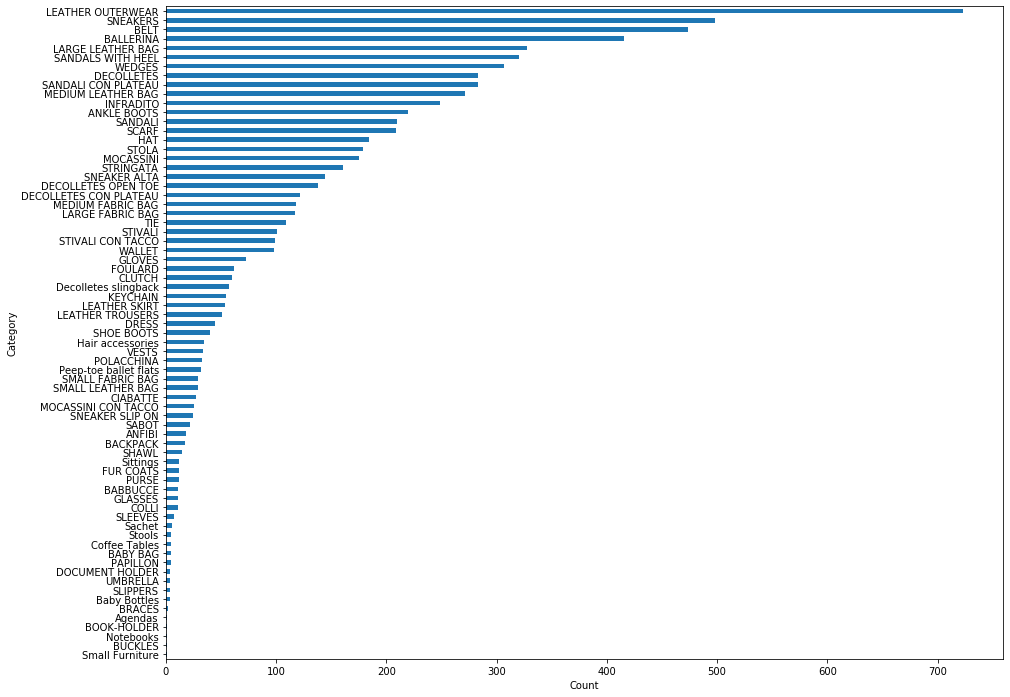

In [22]:
fig= plt.figure(figsize=(15,12))
data4.micro_category.value_counts(ascending=True).plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Category')

In [23]:
Data_Path= '/Users/flatironschool/Downloads/part1/'

In [41]:
import cv2
def plot_figures(figures, nrows = 1, ncols=1,figsize=(8, 8)):
    """Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows,figsize=figsize)
    for ind,title in enumerate(figures):
        axeslist.ravel()[ind].imshow(cv2.cvtColor(figures[title], cv2.COLOR_BGR2RGB))
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout() # optional
    
def img_path(img):
    return Data_Path+img

def load_image(img):
    return cv2.imread(img_path(img))

In [42]:
load_image('35154736FEF_resized.jpg');


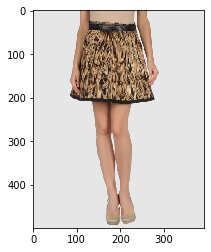

In [43]:


image_path = '/Users/flatironschool/Downloads/part1/35154736FEF_resized.jpg'
img = load_img(Data_Path+data4.iloc[0].filename)
plt.imshow(img)

In [44]:
from keras import models


im = Image.open(image_path)
width, height = im.size
# Pre-Trained Model
base_model = ResNet50(weights='imagenet', 
                      include_top=False, 
                      input_shape = (197, 197, 3))
base_model.trainable = False

# Add Layer Embedding
model = models.Sequential([
    base_model,
    GlobalMaxPooling2D()
])

model.summary()

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras_applications/resnet50.py:263: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_max_pooling2d_2 (Glob (None, 2048)              0         
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


In [45]:
def get_embedding(model, img_name):
    # Reshape
    img = image.load_img(img_path(img_name), target_size=(197, 197))
    # img to Array
    x   = image.img_to_array(img)
    # Expand Dim (1, w, h)
    x   = np.expand_dims(x, axis=0)
    # Pre process Input
    x   = preprocess_input(x)
    return model.predict(x).reshape(-1)

In [46]:
emb = get_embedding(model, data4.iloc[1].filename)
emb.size

2048

[ 0.566298    0.42037618  0.3430457  ...  2.8975239   3.2528515
 15.0629425 ]


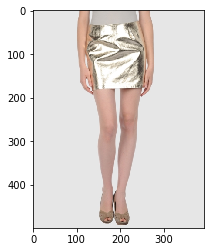

In [47]:
plt.imshow(cv2.cvtColor(load_image(data4.iloc[1].filename), cv2.COLOR_BGR2RGB))
print(emb)

In [48]:
%%time
import swifter


map_embeddings = data4['filename'].swifter.apply(lambda img: get_embedding(model, img))
data_embs        = map_embeddings.apply(pd.Series)

print(data_embs.shape)
data_embs.head()


(7500, 2048)
CPU times: user 2h 34min 47s, sys: 7min 36s, total: 2h 42min 24s
Wall time: 2h 5min 19s


,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.283808,1.736230,0.218873,5.499749,1.585959,1.621852,9.584253,1.673278,5.700523,0.974858,...,1.841537,4.625426,4.836455,7.109380,0.281990,0.000000,0.221036,3.686945,2.989892,26.224792
1,0.566298,0.420376,0.343046,4.930400,3.360434,7.167229,8.831626,3.375045,6.850046,0.000000,...,2.414181,4.756695,5.666263,6.907717,0.559856,1.464723,0.422878,2.897524,3.252851,15.062943
2,2.555057,3.014555,0.586020,7.338143,1.884737,7.076230,8.281777,3.887664,8.664798,0.000000,...,6.614436,2.551303,4.959482,3.889502,1.152679,1.177197,2.477158,3.358292,13.641438,25.201868
3,3.654042,10.462400,0.000000,4.951956,1.325171,2.007029,11.079943,5.120615,4.987312,0.213729,...,0.053115,4.948205,6.927123,7.370433,2.231714,2.249039,2.663607,1.873456,3.620249,16.729837
4,0.957230,8.168704,0.000000,6.320714,1.353875,0.000000,7.804029,2.165272,7.615117,0.844321,...,2.125678,3.588090,3.983064,3.655729,1.491413,0.596378,0.661688,5.482021,0.506374,12.785903


In [50]:
from sklearn.metrics.pairwise import pairwise_distances

# Calculate Cosine Distance 
cosine_sim = 1-pairwise_distances(data_embs, metric='cosine')
cosine_sim[:4, :4]

array([[0.9999998 , 0.82042855, 0.79321456, 0.823589  ],
       [0.82042855, 0.99999976, 0.80721617, 0.84462446],
       [0.79321456, 0.80721617, 1.        , 0.83191216],
       [0.823589  , 0.84462446, 0.83191216, 0.99999976]], dtype=float32)

In [51]:
indices = pd.Series(range(len(data4)), index=data4.index)
indices

# Function that get movie recommendations based on the cosine similarity score of movie genres
def get_recommender(idx, data4, top_n = 5):
    sim_idx    = indices[idx]
    sim_scores = list(enumerate(cosine_sim[sim_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    idx_rec    = [i[0] for i in sim_scores]
    idx_sim    = [i[1] for i in sim_scores]
    
    return indices.iloc[idx_rec].index, idx_sim

get_recommender(2993, data4, top_n = 5)

(Int64Index([3367, 2673, 3410, 2733, 3361], dtype='int64'),
 [0.8289457, 0.817597, 0.81619716, 0.8075663, 0.8066099])

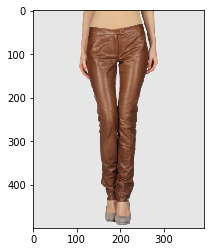

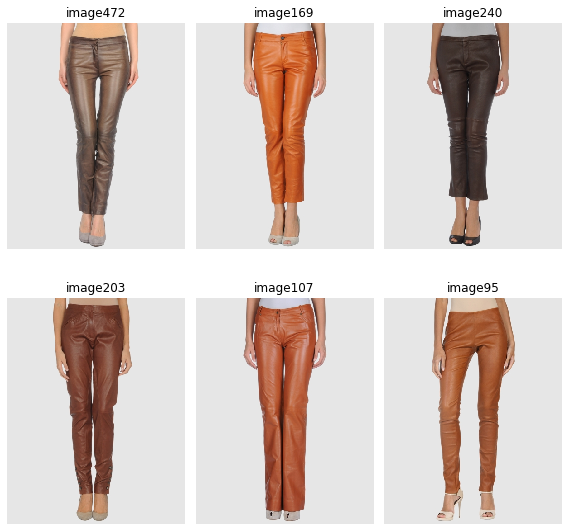

In [64]:

# Idx Item to Recommender
idx_ref = 239


# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, data4, top_n = 6)

# Plot
plt.imshow(cv2.cvtColor(load_image(data4.iloc[idx_ref].filename), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'image'+str(i): load_image(row.filename) for i, row in data4.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)